# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de conusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC


# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from math import sqrt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score

In [2]:
!python3 --version


Python 3.7.11


In [3]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [4]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
print(X.shape)
print(type(X))

(5000, 400)
<class 'numpy.ndarray'>


In [5]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

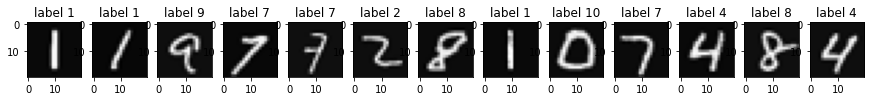

In [6]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de conusion

In [7]:

def Matrice_Confusion(y_test,y_predict):
    
    if len(np.unique(y_test))>len(np.unique(y_predict)):
        nb_classe = len(np.unique(y_test))
    else: nb_classe = len(np.unique(y_predict))
    
    matrice = np.zeros((nb_classe+1,nb_classe+1), dtype=int)
    for vrai,pred in zip(y_test,y_predict):
        matrice[int(vrai)][int(pred)] += 1
    
    
    return matrice.tolist()


def PlotMatriceConfusion(matrice_Confusion):
  
  plt.figure(figsize=(12,12))
   
  ax = sns.heatmap(matrice_Confusion, annot=True, cmap='Reds')

  ax.set_title('Matrice de Confusion')
  ax.set_xlabel('\nValeurs predites')
  ax.set_ylabel('Valeurs réels ')

  
  plt.show()

- Rappel


In [8]:
def Rappel(MatCon):
    taille = len(MatCon)
    
    t_rappel = []
    
    for j in range(taille):
        x = MatCon[j][j]
        y = 0
        for i in range(taille):
            if(i!=j):
                z = MatCon[i] 
                y = y + z[j]
        
        if x!=0 or y!=0 : t_rappel.append(x/(x+y))
    return (sum(t_rappel))/(len(t_rappel))

- Précision

In [50]:
def Precision(MatCon):
    

    taille = len(MatCon)
    
    t_Precision = []
    for i in range(taille):
        x = MatCon[i][i]
        y = 0
        for j in range(taille):
            if(i!=j):
                y +=MatCon[i][j] 
                
        
       

        if x!=0 or y!=0 : t_Precision.append(x/(x+y))
            
    return (sum(t_Precision))/(len(t_Precision))

- Taux de FP

In [10]:
def TauxFP(MatCon):
    taille = len(MatCon)
    
    t_TauxFP = []
    
    for i in range(taille):
        y = 0
        for j in range(taille):
            if(i!=j):
                y +=MatCon[i][j] 
                

        if MatCon[i][i]!=0 or y!=0 : t_TauxFP.append(y/(y+MatCon[i][i]))
            
    return (sum(t_TauxFP))/len(t_TauxFP)

- Spécificité

In [11]:
def Specificite(MatCon):
    return 1 - TauxFP(MatCon)

- Courbe ROC

In [12]:
def ROC(tab_classes,tab_seuils,y_test, y_prob):
    
    
    
    for index, classe in enumerate(tab_classes):
        cord = []
        plt.figure(index)
        for seuil in tab_seuils:
            VP, FP, VN, FN = 0,0,0,0
            for j,prob in enumerate(y_prob):
                
                prob_oui = prob[index]
                prob_non = np.sum(prob) - prob_oui
                
                if prob_oui >= seuil:
                    
                    if y_test[j] == classe : VP+=1
                    else : FP +=1
                
                else:
                    if y_test[j] == classe: VN += 1
                    else: FN += 1
            rappel = VP / (VP+FN)
            speci = VN / (VN+FP)
            cord. append([rappel,speci])
         
        cord = np.array(cord)
        plt.subplot(211)
        plt.title('classe = '+ str(classe))
        plt.plot(1-cord[:,1],cord[:,0])
        plt.show()
            
            

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [13]:
tRatio=2/3
ttRatio=1/3
# implementer la division

Xt,Xtt, Yt,Ytt = train_test_split(X,Y,train_size=(2/3),test_size=(1/3))

In [14]:
Xt.shape

(3333, 400)

In [15]:
Yt.shape

(3333,)

In [16]:
Xtt.shape

(1667, 400)

In [17]:
Ytt.shape

(1667,)

# 1- Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [18]:

def Difference(X,Y):
    return int(((X-Y)**2).sum())
    
def selectF(elem):
    return elem[1]

def KPP(x,Xt, Yt,k=21):
    # Il faudra retourner l'etiquette de x, en le comparant à toutes les données de Xt, Yt
    
    list_n = []
    list_etique = np.zeros(11, dtype=int).tolist()
    
    for i in range(Xt.shape[0]):
        
        if(i<k): #recupere les k 1ers voisins
            list_n.append((Yt[i],Difference(x,Xt[i]))) #ajouter le voisin
            list_n.sort(key=selectF)# trie des voisins du plus proches au plus loins
        else:
            if list_n[len(list_n)-1][1]>Difference(x,Xt[i]): # si un example et moin loin que le dernier 
                #voisin dans le tableai list_n (le plus loins)
                list_n.pop() #enlever ce voisin
                list_n.append((Yt[i],Difference(x,Xt[i]))) #ajouter l'exemple
                list_n.sort(key=selectF)#refaire le trie
    
    for i in range(k):
        list_etique[list_n[i][0]]+=1
        
    
    return list_etique.index(max(list_etique))

## Evaluation du KNN

- Test aleatoire

Le vrai : 4, Predit: 4


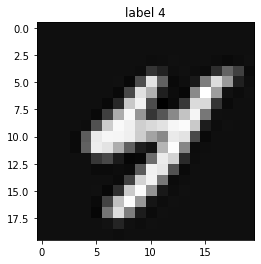

In [19]:
#Tester sur un choix aleatoire

choix = 15
print(f"Le vrai : {Ytt[choix]}, Predit: {KPP(Xtt[choix],Xt,Yt)}")

a = Xtt[choix].reshape((20, 20))

a=np.transpose(a)
plt.title('label '+ str(Y[c]))
plt.imshow(a,cmap='gray')

- Calcler les predictions et le pourcentage du VRAI et FAUX

In [20]:
vrai = np.zeros(11, dtype=int).tolist()
faux = np.zeros(11, dtype=int).tolist()
y_predict_KNN = []

for i in range(Ytt.shape[0]):
    predict = KPP(Xtt[i],Xt,Yt)
    y_predict_KNN.append(predict)
    if(predict == Ytt[i]):
        vrai[predict]+=1
    else:
        faux[Ytt[i]]+=1

In [49]:
#Calculer les Pourcentages

print(f"Pourcentage de vrai:{((sum(vrai)/Xtt.shape[0])*100)}% ")

print(f"Pourcentage de Faux:{((sum(faux)/Xtt.shape[0])*100)}% ")

Pourcentage de vrai:91.72165566886623% 
Pourcentage de Faux:8.278344331133773% 
ERROR! Session/line number was not unique in database. History logging moved to new session 118


- Matrice de Confusion

In [23]:
# Matrice de Confusion

matrice_KNN = Matrice_Confusion(Ytt,y_predict_KNN)

print(np.array(matrice_KNN))


[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0 165   0   0   0   1   0   0   0   0   0]
 [  0  10 139   1   2   0   3   6   2   1   2]
 [  0   2   1 161   0   3   0   3   1   1   0]
 [  0   6   0   0 150   1   2   0   0   8   0]
 [  0   3   1   2   1 144   1   1   1   7   2]
 [  0   2   0   0   0   1 180   0   0   0   1]
 [  0  10   1   0   0   0   0 156   0   9   1]
 [  0   5   0   6   1   3   3   0 124   7   0]
 [  0   0   0   2   0   0   1   2   0 155   3]
 [  0   0   0   0   0   1   3   0   1   0 155]]


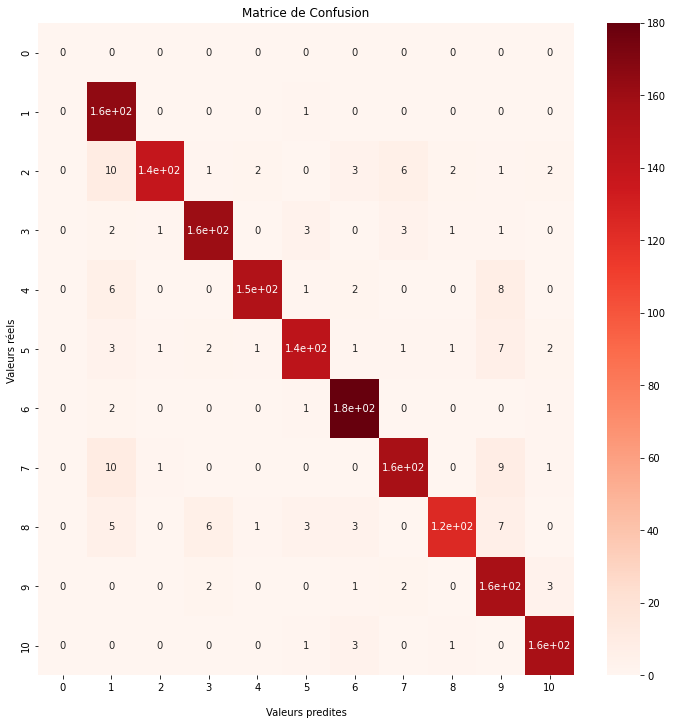

In [24]:
PlotMatriceConfusion(np.array(matrice_KNN))

- Calcule des Metrics

In [51]:
# Rappel
rappel = Rappel(matrice_KNN)
print(f"Le rappel: {rappel}")

#Precision
precision = Precision(matrice_KNN)
print(f"La precision: {precision}")


#Taux du faux positifs
taux_fp = TauxFP(matrice_KNN)
print(f"Taux du faux positifs: {taux_fp}")

#Specificite
spec = Specificite(matrice_KNN)
print(f"La Specificite: {spec}")


Le rappel: 0.9228862803950311
La precision: 0.9160512800737235
Taux du faux positifs: 0.08394871992627653
La Specificite: 0.9160512800737235


## Evaluation du KNN avec SKlearn

In [26]:
confusion_matrix(Ytt,y_predict_KNN)

array([[165,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [ 10, 139,   1,   2,   0,   3,   6,   2,   1,   2],
       [  2,   1, 161,   0,   3,   0,   3,   1,   1,   0],
       [  6,   0,   0, 150,   1,   2,   0,   0,   8,   0],
       [  3,   1,   2,   1, 144,   1,   1,   1,   7,   2],
       [  2,   0,   0,   0,   1, 180,   0,   0,   0,   1],
       [ 10,   1,   0,   0,   0,   0, 156,   0,   9,   1],
       [  5,   0,   6,   1,   3,   3,   0, 124,   7,   0],
       [  0,   0,   2,   0,   0,   1,   2,   0, 155,   3],
       [  0,   0,   0,   0,   1,   3,   0,   1,   0, 155]])

In [27]:

# Rappel
rappel_ = recall_score(Ytt,y_predict_KNN,average='macro')
print(f"Le rappel: {rappel_}")

#Precision
precision_ = precision_score(Ytt,y_predict_KNN,average='macro')
print(f"La precision: {precision_}")

Le rappel: 0.9160512800737235
La precision: 0.9228862803950311


# 2- Méthode 1: MVS
Machine à Vecteurs de Support

In [28]:
#Créer le modèle
model_svm= svm.SVC(kernel='linear',probability = True) 
# entrainement 
model_svm.fit(Xt, Yt)
# Prediction
y_pred_svm = model_svm.predict(Xtt)
model_svm.score(Xtt,Ytt)

0.9226154769046191

- Test aleatoire

La model a predit:10


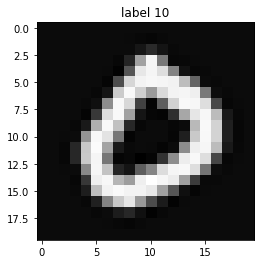

In [29]:
# tester une image
c= 8
print(f"La model a predit:{y_pred_svm[c]}")
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

## Evaluation du SVM

- Matrice de Confusion


In [30]:
# Matrice de Confusion

matrice_svm = Matrice_Confusion(Ytt,y_pred_svm)

print(np.array(matrice_svm))

[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0 163   1   1   1   0   0   0   0   0   0]
 [  0   8 147   1   2   0   4   2   2   0   0]
 [  0   0   4 157   0   6   0   2   2   1   0]
 [  0   0   1   0 163   0   0   0   0   3   0]
 [  0   1   3   9   2 144   1   1   1   1   0]
 [  0   2   2   0   2   4 174   0   0   0   0]
 [  0   2   3   1   3   0   0 162   0   5   1]
 [  0   3   7   5   0   4   0   1 127   2   0]
 [  0   0   1   2   5   1   0   7   0 145   2]
 [  0   0   0   1   0   1   1   0   0   1 156]]


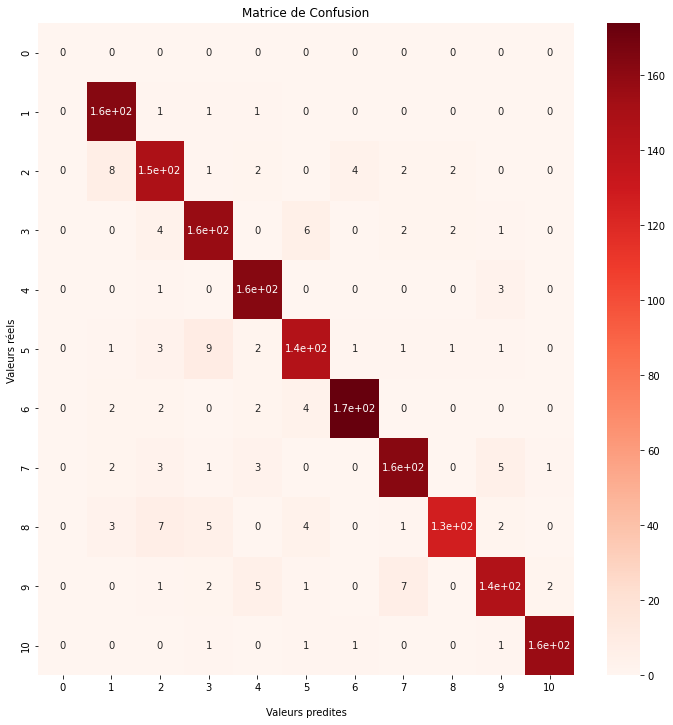

In [31]:
PlotMatriceConfusion(np.array(matrice_svm))

- Autres Metrics

In [32]:
# Rappel
rappel = Rappel(matrice_svm)
print(f"Le rappel: {rappel}")

#Precision
precision = Precision(matrice_svm)
print(f"La precision: {precision}")


#Taux du faux positifs
taux_fp = TauxFP(matrice_svm)
print(f"Taux du faux positifs: {taux_fp}")

#Specificite
spec = Specificite(matrice_svm)
print(f"La Specificite: {spec}")


Le rappel: 0.9236528756104135
[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0 163   1   1   1   0   0   0   0   0   0]
 [  0   8 147   1   2   0   4   2   2   0   0]
 [  0   0   4 157   0   6   0   2   2   1   0]
 [  0   0   1   0 163   0   0   0   0   3   0]
 [  0   1   3   9   2 144   1   1   1   1   0]
 [  0   2   2   0   2   4 174   0   0   0   0]
 [  0   2   3   1   3   0   0 162   0   5   1]
 [  0   3   7   5   0   4   0   1 127   2   0]
 [  0   0   1   2   5   1   0   7   0 145   2]
 [  0   0   0   1   0   1   1   0   0   1 156]]
La precision: 0.9217570020843203
Taux du faux positifs: 0.07824299791567976
La Specificite: 0.9217570020843202


- Courbe ROC

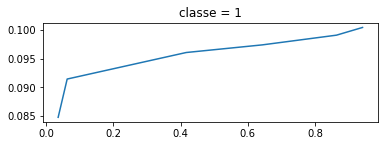

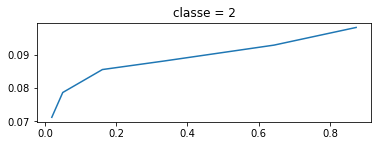

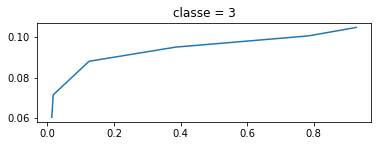

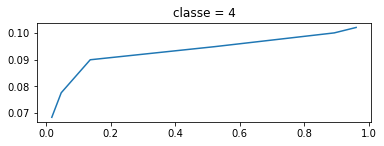

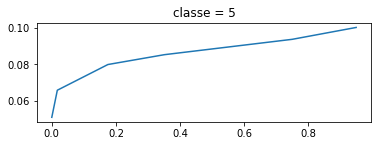

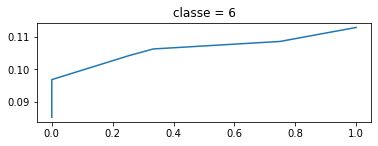

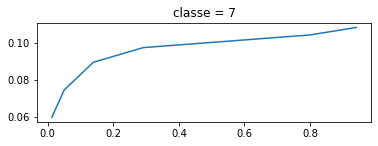

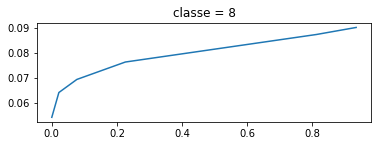

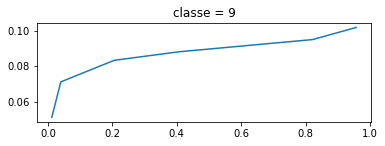

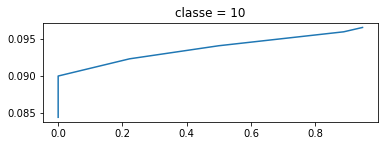

In [33]:
#Courbe de ROC
vect_classes = np.array([1,2,3,4,5,6,7,8,9,10])
seuils = [0.1,0.2,0.4,0.6,0.8,0.9]
y_prob_SVM = model_svm.predict_proba(Xtt)

ROC(vect_classes,seuils,Ytt, y_prob_SVM)


# 3- Méthode 2: Arbres de décision



In [34]:
# Créer le modèle
model_arbre = DecisionTreeClassifier(max_depth=5) #Afin a'avoir des probabilites on ajoute une limite de profodeure
# Entrainer le modèle
model_arbre = model_arbre.fit(Xt, Yt)
# Prediction
y_pred_arbre = model_arbre.predict(Xtt)

La verit terrain: 8


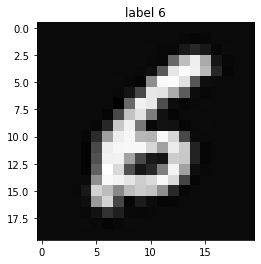

In [35]:
# tester une image
c= 3
print(f"La verit terrain: {y_pred_arbre[c]}")
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

## Calcule de Performance


- Matrice de confusion


In [36]:
# Matrice de Confusion
y_pred_arbre = model_arbre.predict(Xtt)

matrice_arbre = Matrice_Confusion(Ytt,y_pred_svm)

print(np.array(matrice_arbre))

[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0 163   1   1   1   0   0   0   0   0   0]
 [  0   8 147   1   2   0   4   2   2   0   0]
 [  0   0   4 157   0   6   0   2   2   1   0]
 [  0   0   1   0 163   0   0   0   0   3   0]
 [  0   1   3   9   2 144   1   1   1   1   0]
 [  0   2   2   0   2   4 174   0   0   0   0]
 [  0   2   3   1   3   0   0 162   0   5   1]
 [  0   3   7   5   0   4   0   1 127   2   0]
 [  0   0   1   2   5   1   0   7   0 145   2]
 [  0   0   0   1   0   1   1   0   0   1 156]]


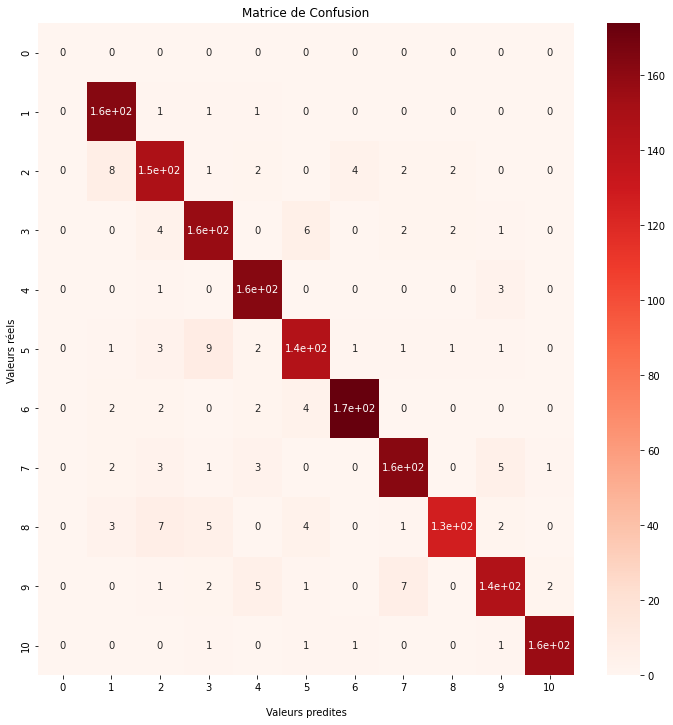

In [37]:
PlotMatriceConfusion(np.array(matrice_arbre))

In [38]:
# Rappel
rappel = Rappel(matrice_arbre)
print(f"Le rappel: {rappel}")

#Precision
precision = Precision(matrice_arbre)
print(f"La precision: {precision}")


#Taux du faux positifs
taux_fp = TauxFP(matrice_arbre)
print(f"Taux du faux positifs: {taux_fp}")

#Specificite
spec = Specificite(matrice_arbre)
print(f"La Specificite: {spec}")


Le rappel: 0.9236528756104135
[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0 163   1   1   1   0   0   0   0   0   0]
 [  0   8 147   1   2   0   4   2   2   0   0]
 [  0   0   4 157   0   6   0   2   2   1   0]
 [  0   0   1   0 163   0   0   0   0   3   0]
 [  0   1   3   9   2 144   1   1   1   1   0]
 [  0   2   2   0   2   4 174   0   0   0   0]
 [  0   2   3   1   3   0   0 162   0   5   1]
 [  0   3   7   5   0   4   0   1 127   2   0]
 [  0   0   1   2   5   1   0   7   0 145   2]
 [  0   0   0   1   0   1   1   0   0   1 156]]
La precision: 0.9217570020843203
Taux du faux positifs: 0.07824299791567976
La Specificite: 0.9217570020843202


### Avec SKlearn

In [39]:
confusion_matrix(Ytt,y_pred_svm)

array([[163,   1,   1,   1,   0,   0,   0,   0,   0,   0],
       [  8, 147,   1,   2,   0,   4,   2,   2,   0,   0],
       [  0,   4, 157,   0,   6,   0,   2,   2,   1,   0],
       [  0,   1,   0, 163,   0,   0,   0,   0,   3,   0],
       [  1,   3,   9,   2, 144,   1,   1,   1,   1,   0],
       [  2,   2,   0,   2,   4, 174,   0,   0,   0,   0],
       [  2,   3,   1,   3,   0,   0, 162,   0,   5,   1],
       [  3,   7,   5,   0,   4,   0,   1, 127,   2,   0],
       [  0,   1,   2,   5,   1,   0,   7,   0, 145,   2],
       [  0,   0,   1,   0,   1,   1,   0,   0,   1, 156]])

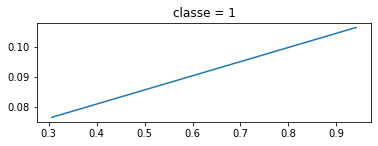

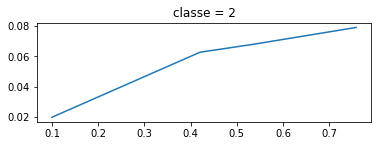

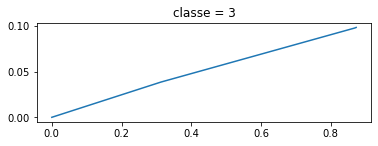

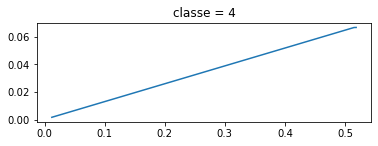

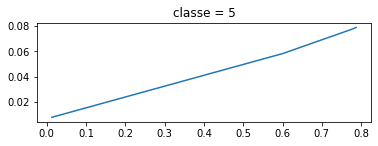

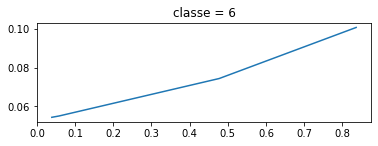

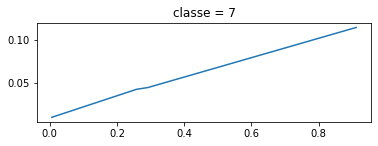

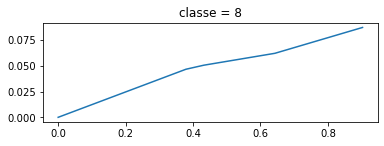

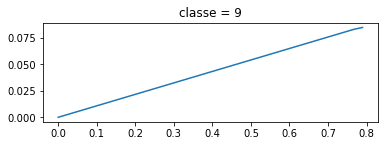

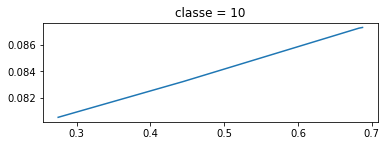

In [40]:
#Courbe ROC
vect_classes = np.array([1,2,3,4,5,6,7,8,9,10])
seuils = [0.1,0.2,0.4,0.6,0.8,0.9]
y_prob_arbre = model_arbre.predict_proba(Xtt)

ROC(vect_classes,seuils,Ytt, y_prob_arbre)

# 4- Méthode 3: RN 
Réseaux de neurones Perceptron

In [41]:
model_rn = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt_, Xtt_, Yt_, Ytt_ = train_test_split(X, Y, random_state=0, test_size=0.7)
model_rn.fit(Xt_, Yt_)
print(model_rn.score(Xtt_,Ytt_))

0.10028571428571428


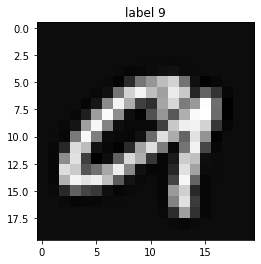

In [42]:
a = Xtt_[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt_[c]))
plt.imshow(a,cmap='gray')

In [43]:
# Choisir un image de test 
c=0

print(f"La prediction: {model_rn.predict([Xtt_[c,:]])}")

# pour ROC, il faudra les probabilités:
print(f"Les probs: {model_rn.predict_proba([Xtt_[c,:]])}")

La prediction: [5]
Les probs: [[0.1096373  0.1070561  0.10054859 0.09972198 0.11091142 0.09576403
  0.09034511 0.10994933 0.08694877 0.08911736]]


## Evaluation

In [44]:
# Matrice de Confusion
y_pred_rn = model_rn.predict(Xtt_)

matrice_rn = Matrice_Confusion(Ytt_,y_pred_rn)

print(np.array(matrice_rn))

[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 351   0   0   0   0   0]
 [  0   0   0   0   0 354   0   0   0   0   0]
 [  0   0   0   0   0 358   0   0   0   0   0]
 [  0   0   0   0   0 338   0   0   0   0   0]
 [  0   0   0   0   0 351   0   0   0   0   0]
 [  0   0   0   0   0 343   0   0   0   0   0]
 [  0   0   0   0   0 350   0   0   0   0   0]
 [  0   0   0   0   0 350   0   0   0   0   0]
 [  0   0   0   0   0 351   0   0   0   0   0]
 [  0   0   0   0   0 354   0   0   0   0   0]]


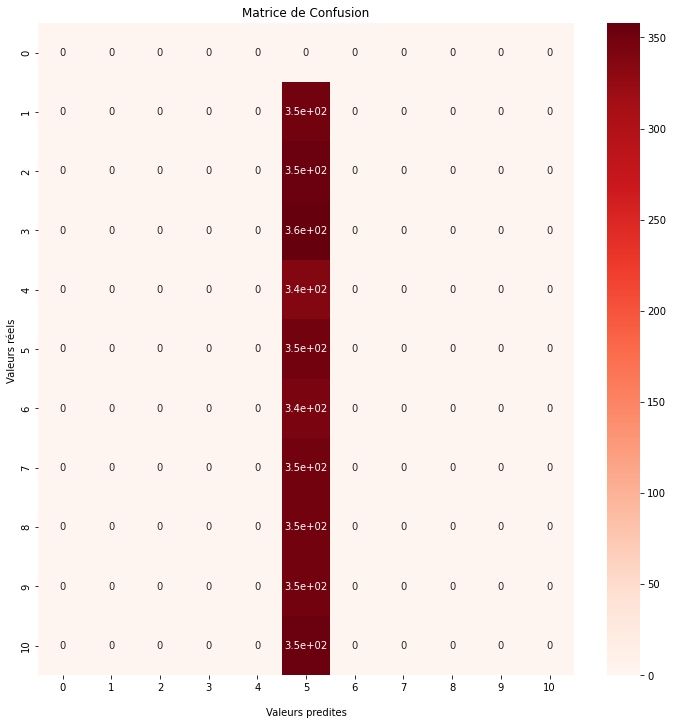

In [45]:
PlotMatriceConfusion(np.array(matrice_rn))

In [46]:
# Rappel
rappel_rn = Rappel(matrice_rn)
print(f"Le rappel: {rappel}")

#Precision
precision_rn = Precision(matrice_rn)
print(f"La precision: {precision_rn}")


#Taux du faux positifs
taux_fp_rn = TauxFP(matrice_rn)
print(f"Taux du faux positifs: {taux_fp_rn}")

#Specificite
spec_rn = Specificite(matrice_rn)
print(f"La Specificite: {spec_rn}")


Le rappel: 0.9236528756104135
[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 351   0   0   0   0   0]
 [  0   0   0   0   0 354   0   0   0   0   0]
 [  0   0   0   0   0 358   0   0   0   0   0]
 [  0   0   0   0   0 338   0   0   0   0   0]
 [  0   0   0   0   0 351   0   0   0   0   0]
 [  0   0   0   0   0 343   0   0   0   0   0]
 [  0   0   0   0   0 350   0   0   0   0   0]
 [  0   0   0   0   0 350   0   0   0   0   0]
 [  0   0   0   0   0 351   0   0   0   0   0]
 [  0   0   0   0   0 354   0   0   0   0   0]]
La precision: 0.1
Taux du faux positifs: 0.9
La Specificite: 0.09999999999999998


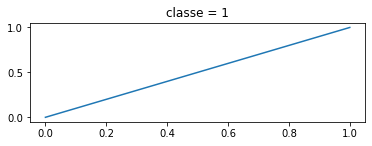

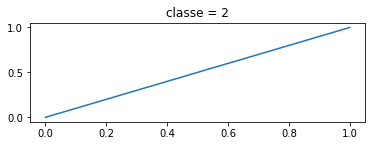

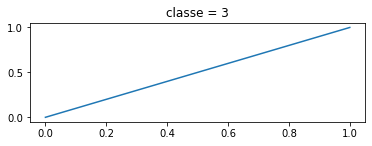

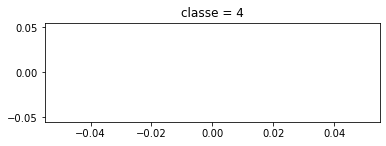

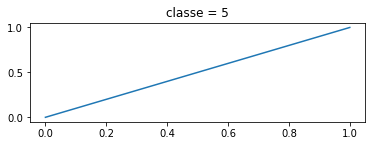

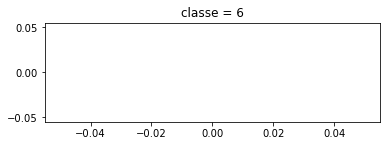

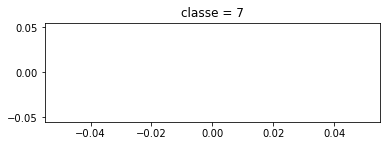

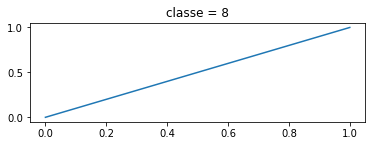

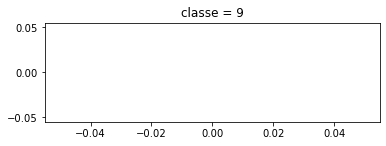

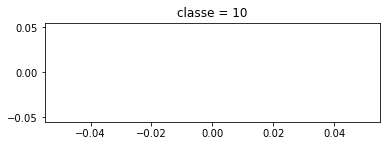

In [47]:
vect_classes = np.array([1,2,3,4,5,6,7,8,9,10])
seuils = [0.1,0.2,0.4,0.6,0.8,0.9]

y_prob_pred = model_rn.predict_proba(Xtt)
ROC(vect_classes,seuils,Ytt, y_prob_pred)


# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [48]:
# reshape dataset to have a single channel
Xt__, Xtt__, Yt__, Ytt__ = train_test_split(X, Y, random_state=0, test_size=0.7)

Xt_rnc = Xt__.reshape((Xt__.shape[0], 20, 20, 1))
Xtt_rnc = Xtt__.reshape((Xtt__.shape[0], 20, 20, 1))

In [ ]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)


2022-03-11 20:23:32.719270: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-03-11 20:23:32.955602: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1800000000 Hz
2022-03-11 20:23:32.969458: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5641e1f25c90 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-11 20:23:32.969559: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-03-11 20:23:33.003298: I tensorflow/core/common_runtime/process_util.cc:147] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below 

Traceback (most recent call last):
  File "/home/cherif/anaconda3/envs/myenv2/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_17868/1540385833.py", line 24, in <module>
    _, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)
  File "/home/cherif/anaconda3/envs/myenv2/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py", line 930, in evaluate
    use_multiprocessing=use_multiprocessing)
  File "/home/cherif/anaconda3/envs/myenv2/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 490, in evaluate
    use_multiprocessing=use_multiprocessing, **kwargs)
  File "/home/cherif/anaconda3/envs/myenv2/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 426, in _model_iteration
    use_multiprocessing=use_multiprocessing)
  File "/home/cherif/anaconda3/envs/myenv2/lib/python3.7/site-packages

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 4 Mars 2022 à 22h

La partie RNC peut être laissée pour le prochain TP

# bonne chance